In [18]:
## import modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
## Enable multiple outputs from jupyter cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
## disable the Pandas "setting a copy of a slice" warning
pd.options.mode.chained_assignment = None
## set default number of DataFrame rows printed to 6
pd.set_option('display.max_rows', 10)

In [19]:
## set working directory
os.getcwd()

'/Users/meghanlaturney/Documents/documents/postdoc/williams_lab/manuscript_fecundity/figure_1'

In [20]:
## import data
df_alldata = pd.read_csv('all_data.csv')
df_alldata['court'] = df_alldata['number_call_bouts'].apply(lambda x: 1 if x > 0 else 0)
df_alldata.head()

,age,female_morph,number_call_bouts,cop,ovary_mass_mg,pronotum_width,court
0,1,LW,0,0,61.0,1970.41,0
1,1,LW,0,0,28.5,1753.62,0
2,1,LW,0,0,16.3,1799.46,0
3,1,LW,8,0,5.9,2063.89,1
4,1,LW,0,0,4.7,1991.11,0


In [21]:
# look at the categorical variables

cat_vars = ['age','female_morph','cop','court']
for i in cat_vars:
    print(i)
    out = pd.DataFrame({
        'count':df_alldata[i].value_counts(),
        'proportion':df_alldata[i].value_counts(normalize=True),
    })
    print(out)
    print("*****************************************")

age
     count  proportion
age                   
5       43       0.215
1       40       0.200
9       40       0.200
7       39       0.195
3       38       0.190
*****************************************
female_morph
              count  proportion
female_morph                   
SW              104        0.52
LW               96        0.48
*****************************************
cop
     count  proportion
cop                   
0      156        0.78
1       44        0.22
*****************************************
court
       count  proportion
court                   
1        122        0.61
0         78        0.39
*****************************************


In [22]:
# look at the reproductive behavior

print("*** no. females/morph/day***")
pd.pivot_table(df_alldata, values='ovary_mass_mg', index='female_morph', columns='age',
               aggfunc='count')
print("*** no. females courted/morph/day***")
pd.pivot_table(df_alldata, values='court', index='female_morph', columns='age',
               aggfunc='sum')
print("*** no. females copulated/morph/day***")
pd.pivot_table(df_alldata, values='cop', index='female_morph', columns='age',
               aggfunc='sum')

*** no. females/morph/day***


age,1,3,5,7,9
female_morph,,,,,
LW,20,18,22,16,20
SW,20,20,21,23,20


*** no. females courted/morph/day***


age,1,3,5,7,9
female_morph,,,,,
LW,10,9,13,14,13
SW,12,9,15,19,8


*** no. females copulated/morph/day***


age,1,3,5,7,9
female_morph,,,,,
LW,0,2,4,5,10
SW,0,2,9,6,6


In [23]:
# Look at continuous variables

print("*** ovary mass/morph/day***")
pd.pivot_table(df_alldata, values='ovary_mass_mg', index='female_morph', columns='age',
               aggfunc='mean')
print("*** pronotum width/morph/day***")
pd.pivot_table(df_alldata, values='pronotum_width', index='female_morph', columns='age',
               aggfunc='mean')

*** ovary mass/morph/day***


age,1,3,5,7,9
female_morph,,,,,
LW,17.765,55.544444,125.704545,144.237500,196.045
SW,20.365,58.475000,131.219048,154.921739,255.090


*** pronotum width/morph/day***


age,1,3,5,7,9
female_morph,,,,,
LW,1881.8520,1850.889444,1847.890000,1784.276875,1838.1030
SW,1899.1745,1869.688500,1819.042857,1775.100870,1849.1795


In [24]:
average_mass_per_day = df_alldata.groupby('age')['ovary_mass_mg'].mean()
average_mass_per_day

age
1     19.065000
3     57.086842
5    128.397674
7    150.538462
9    225.567500
Name: ovary_mass_mg, dtype: float64

<Axes: xlabel='age', ylabel='ovary_mass_mg'>

/Users/meghanlaturney/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/meghanlaturney/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='ovary_mass_mg'>

Text(0.5, 0, 'Age (days)')

Text(0, 0.5, 'Ovary mass (mg)')

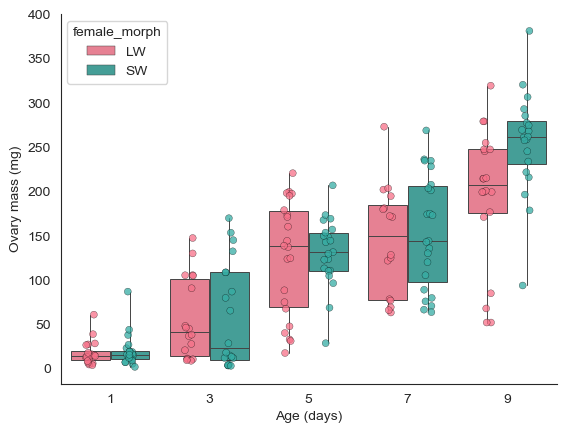

In [25]:
# Ovary mass across age and morph

sns.set_style("white")
sns.boxplot(df_alldata, x="age", y="ovary_mass_mg", hue="female_morph",whis=(0, 100),showcaps=False,
    palette='husl', linewidth = 0.7, showfliers=False)
sns.stripplot(
    data=df_alldata, x="age", y="ovary_mass_mg", hue="female_morph",
            palette='husl', edgecolor = "black", linewidth = 0.25, jitter = True, size = 5, alpha = 0.75,
    dodge=True, legend=False)

# add descriptive texts
sns.despine()
plt.xlabel('Age (days)')
plt.ylabel('Ovary mass (mg)')
plt.savefig('figure1a.png', dpi=300)

In [26]:
## make a dataframe that includes days 3-9 for analysis

df_3_9 = (df_alldata.loc[df_alldata['age'] > 1, ]).reset_index(drop=True)
df_3_9

,age,female_morph,number_call_bouts,cop,ovary_mass_mg,pronotum_width,court
0,3,LW,1,0,45.2,1864.75,1
1,3,LW,0,0,11.5,1597.53,0
2,3,LW,0,0,48.3,1684.94,0
3,3,SW,0,0,153.5,1792.63,0
4,3,SW,8,0,3.6,2049.15,1
...,...,...,...,...,...,...,...
155,9,SW,1,0,245.4,1855.52,1
156,9,SW,0,0,261.9,1707.73,0
157,9,SW,1,1,233.8,1836.66,1
158,9,SW,0,1,257.7,1957.20,0


Shapiro-Wilk Statistic: 0.9745199084281921
P-value: 0.004686178173869848
Ovary masses do not look Gaussian (reject H0)


<Figure size 800x500 with 0 Axes>

(array([12., 12.,  6.,  9.,  5., 11., 13.,  4.,  3.,  1.]),
 array([  8.9 ,  39.95,  71.  , 102.05, 133.1 , 164.15, 195.2 , 226.25,
        257.3 , 288.35, 319.4 ]),
 <BarContainer object of 10 artists>)

(array([12.,  6., 13., 17.,  9.,  8.,  9.,  7.,  2.,  1.]),
 array([  3.2,  41. ,  78.8, 116.6, 154.4, 192.2, 230. , 267.8, 305.6,
        343.4, 381.2]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Value')

Text(0, 0.5, 'Frequency')

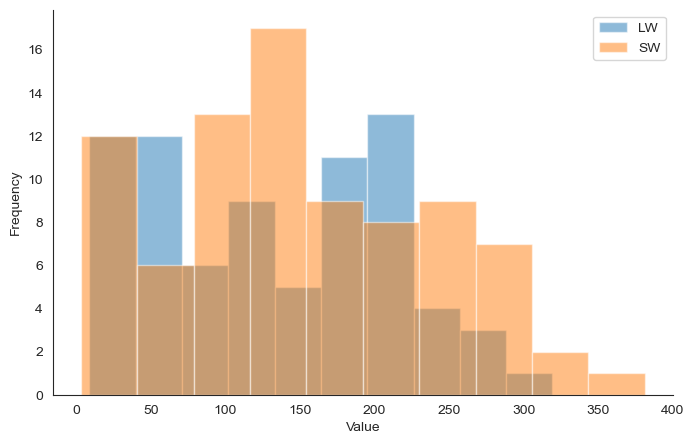

In [27]:
# Check if normally distributed

from scipy.stats import shapiro
stat, p = shapiro(df_3_9['ovary_mass_mg'])
# Print the results
print('Shapiro-Wilk Statistic:', stat)
print('P-value:', p)
# Interpret the results
alpha = 0.05
if p > alpha:
    print('Ovary masses look Gaussian (fail to reject H0)')
else:
    print('Ovary masses do not look Gaussian (reject H0)')
    
# Histograms (Normality)
plt.figure(figsize=(8, 5))
for group in df_3_9['female_morph'].unique():
    plt.hist(df_3_9[df_3_9['female_morph'] == group]['ovary_mass_mg'], alpha=0.5,label=group)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
sns.despine()
#plt.savefig('figure1_assumptions_histogram.png')

In [28]:
# Data is not normally distrubuted, use a GLM to model ovary mass

from statsmodels.formula.api import glm

model_ovary_mass = glm(formula='ovary_mass_mg ~ C(female_morph)*age', data=df_3_9).fit()
print(model_ovary_mass.summary())
print(model_ovary_mass.aic)
fitted_values = model_ovary_mass.fittedvalues
residuals = model_ovary_mass.resid_deviance

                 Generalized Linear Model Regression Results                  
Dep. Variable:          ovary_mass_mg   No. Observations:                  160
Model:                            GLM   Df Residuals:                      156
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          3703.5
Method:                          IRLS   Log-Likelihood:                -882.37
Date:                Wed, 16 Apr 2025   Deviance:                   5.7774e+05
Time:                        14:00:29   Pearson chi2:                 5.78e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6179
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<Axes: >

Text(0.5, 0, 'Fitted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residuals vs. Fitted Values')

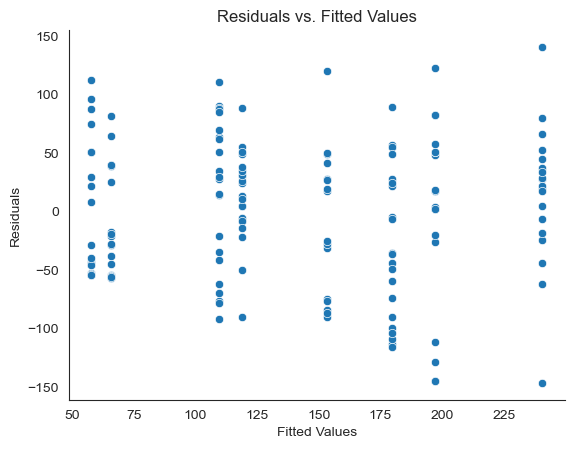

In [29]:
sns.scatterplot(x=fitted_values, y=residuals)
sns.despine()
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.savefig('suppfigure1a.png', dpi=300)

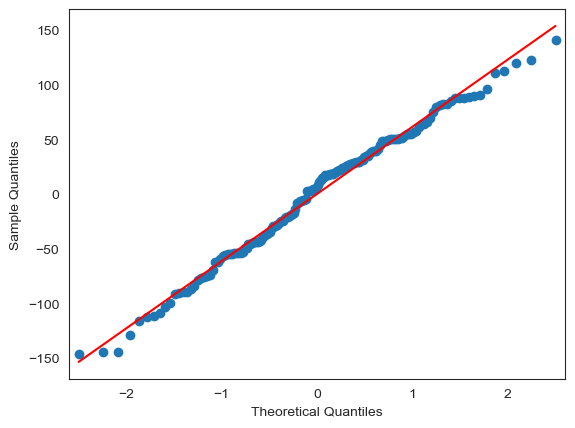

Text(0.5, 1.0, 'Q-Q Plot of Deviance Residuals')

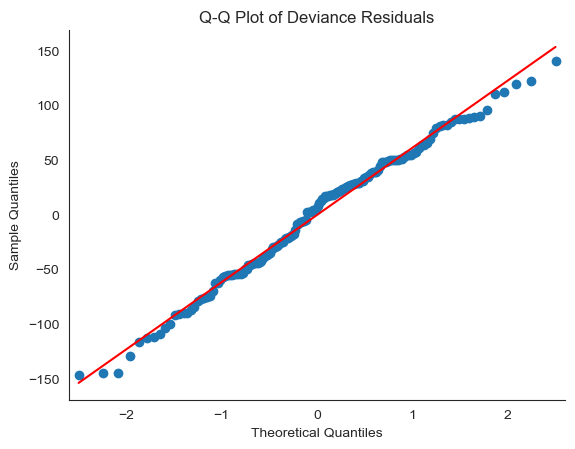

In [30]:
# Create the Q-Q plot
sm.qqplot(residuals, line='r') # 'r' specifies a regression line for comparison
plt.title('Q-Q Plot of Deviance Residuals')
sns.despine()
plt.savefig('suppfigure1b.png', dpi=300)

In [31]:
# Try other models and families (gamma or inverse gaussian) to model ovary mass

from statsmodels.formula.api import glm

model_glm_1 = glm(formula='ovary_mass_mg ~ age', data=df_3_9).fit()
print(model_glm_1.summary())
print(model_glm_1.aic)

model_glm_2 = glm(formula='ovary_mass_mg ~ C(female_morph)*age + pronotum_width', data=df_3_9).fit()
print(model_glm_2.summary())
print(model_glm_2.aic)

model_glm_3 = glm(formula='ovary_mass_mg ~ age*pronotum_width', data=df_3_9).fit()
print(model_glm_3.summary())
print(model_glm_3.aic)

model_glm_4 = glm(formula='ovary_mass_mg ~ age*pronotum_width+C(female_morph)', data=df_3_9, family=sm.families.InverseGaussian(link=sm.families.links.InverseSquared())).fit()
print(model_glm_4.summary())
print(model_glm_4.aic)

#family=sm.families.Gamma(link=sm.families.links.log())
#family=sm.families.Gamma(link=sm.families.links.log())

## Table 1

                 Generalized Linear Model Regression Results                  
Dep. Variable:          ovary_mass_mg   No. Observations:                  160
Model:                            GLM   Df Residuals:                      158
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          3828.0
Method:                          IRLS   Log-Likelihood:                -886.03
Date:                Wed, 16 Apr 2025   Deviance:                   6.0482e+05
Time:                        14:00:30   Pearson chi2:                 6.05e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5878
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.0491     14.158     -1.204      0.2

<Axes: xlabel='age', ylabel='ovary_mass_mg'>

<Axes: xlabel='age', ylabel='ovary_mass_mg'>

Text(0.5, 0, 'Age (days)')

Text(0, 0.5, 'Ovary mass (mg)')

SignificanceResult(statistic=0.6823800822738617, pvalue=2.907717714305314e-23)

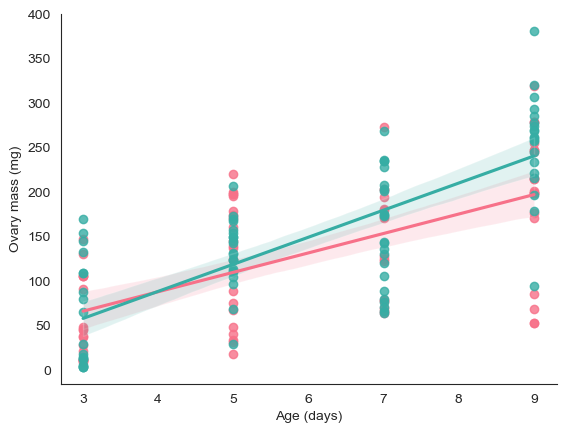

In [32]:
# scatterplot to show that age and ovary mass are correlated

lw_om = (df_3_9.loc[df_3_9['female_morph'] == 'LW', ['ovary_mass_mg','age']])
sw_om = (df_3_9.loc[df_3_9['female_morph'] == 'SW', ['ovary_mass_mg','age']])
sns.set_style("white")
sns.regplot(x='age', y='ovary_mass_mg', data=lw_om, color = '#f77189')
sns.regplot(x='age', y='ovary_mass_mg', data=sw_om, color = '#36ada4')
# add descriptive texts
sns.despine()
plt.xlabel('Age (days)')
plt.ylabel('Ovary mass (mg)')
plt.savefig('suppfigure1c.png', dpi=300)

stats.spearmanr(df_3_9['age'], df_3_9['ovary_mass_mg'])

In [33]:
# make age-corrected ovary mass
df_3_9['resids'] = residuals

<Axes: xlabel='age', ylabel='value'>

([<matplotlib.axis.YTick at 0x149054a50>,
 [Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00')])

Text(0.5, 0, 'Age (days)')

Text(0, 0.5, 'Proportion courted')

,age,variable,value
0,1,perc_courted_LW,0.500000
1,3,perc_courted_LW,0.500000
2,5,perc_courted_LW,0.590909
3,7,perc_courted_LW,0.875000
4,9,perc_courted_LW,0.650000
5,1,perc_courted_SW,0.600000
6,3,perc_courted_SW,0.450000
7,5,perc_courted_SW,0.714286
8,7,perc_courted_SW,0.826087
9,9,perc_courted_SW,0.400000


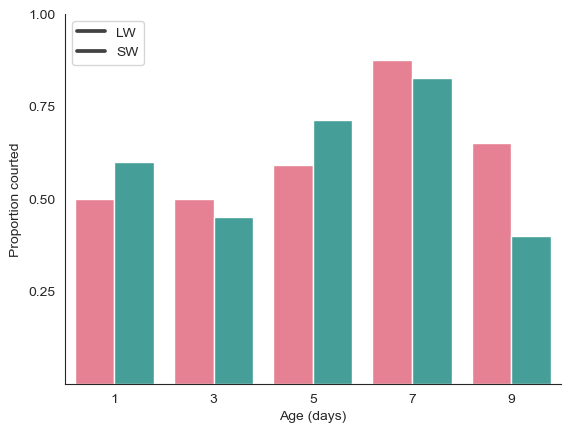

In [34]:
# Make a Bar Chart: propotion of females courted per day per morph

#Make 4 lists
days = df_alldata['age'].unique().tolist() #days (1,3,5,7,9)
list_lw = [] #number of lw females per day
list_sw = [] #number of sw females per day
list_courted_lw = [] #number of lw females courted per day
list_courted_sw = [] #number of sw females courted per day
for num in days:
    list_lw.append(((df_alldata['age'] == num)&(df_alldata['female_morph'] == "LW")).sum())
for num in days:
    list_sw.append(((df_alldata['age'] == num)&(df_alldata['female_morph'] == "SW")).sum())
for num in days:
    list_courted_lw.append(
        ((df_alldata['age'] == num)&(df_alldata['female_morph'] == "LW")&(df_alldata['court'] == 1)).sum())
for num in days:
    list_courted_sw.append(
        ((df_alldata['age'] == num)&(df_alldata['female_morph'] == "SW")&(df_alldata['court'] == 1)).sum())   

#Make a new dataframe with the 4 new lists
df_percentage_courted = pd.DataFrame({
    'age': days,
    'LW': list_lw,
    'SW': list_sw,
    'LW_c': list_courted_lw,
    'SW_c': list_courted_sw
})
#create new columns and calculate percent courted each day for each morph
df_percentage_courted["perc_courted_LW"] = (df_percentage_courted['LW_c']/df_percentage_courted['LW'])
df_percentage_courted["perc_courted_SW"] = (df_percentage_courted['SW_c']/df_percentage_courted['SW'])

# Melt the dataframe to long format
df_melted = pd.melt(df_percentage_courted, id_vars='age', value_vars=["perc_courted_LW","perc_courted_SW"])
# Plot the bar graphs
sns.barplot(x='age', y='value', hue='variable', data=df_melted, palette='husl')
# add descriptive texts
sns.despine()
plt.yticks([0.25, 0.5, 0.75, 1.0])
plt.xlabel('Age (days)')
plt.ylabel('Proportion courted')
plt.legend(loc = "upper left", labels=['LW', 'SW']);
plt.savefig('suppfigure2a.png', dpi=300)
df_melted

<Axes: xlabel='age', ylabel='value'>

([<matplotlib.axis.YTick at 0x13a087890>,
 [Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00')])

Text(0.5, 0, 'Age (days)')

Text(0, 0.5, 'Proportion mated')

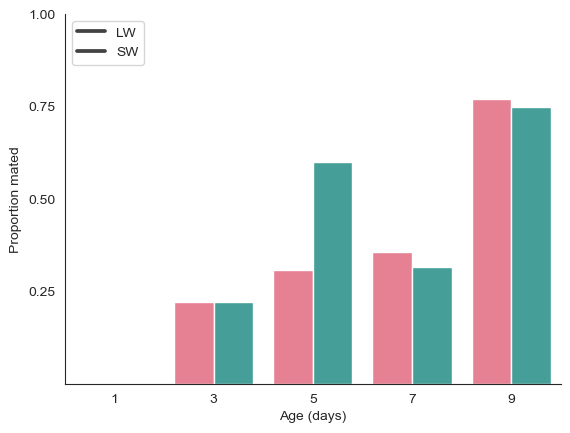

In [16]:
# Make a Bar Chart: propotion of females that copulated per day per morph

# Make 2 new lists, number of females that copulated per age for each morph 

#days = df_alldata['age'].unique().tolist() #already defined
morphs = df_alldata['female_morph'].unique().tolist()

combo_list = []
for mor in morphs:
    for num in days:
        morList =((df_alldata['age'] == num)&(df_alldata['female_morph'] == mor)&(df_alldata['cop'] == 1)).sum()
        combo_list.append(morList)
        
list_cop_lw = combo_list[:5]
list_cop_sw = combo_list[5:]

#Make a new df
df_percentage_court_cop = pd.DataFrame({
    'age': days,
    'LW_c': list_courted_lw,
    'SW_c': list_courted_sw,
    'LW_cc': list_cop_lw,
    'SW_cc': list_cop_sw
})
df_percentage_court_cop["perc_cc_LW"] = (df_percentage_court_cop['LW_cc']/df_percentage_courted['LW_c'])
df_percentage_court_cop["perc_cc_SW"] = (df_percentage_court_cop['SW_cc']/df_percentage_courted['SW_c'])
# Melt the dataframe to long format
df_cop_melted = pd.melt(df_percentage_court_cop, id_vars='age', value_vars=["perc_cc_LW","perc_cc_SW"])
sns.barplot(x='age', y='value', hue='variable', data=df_cop_melted, palette='husl')
# add descriptive texts
sns.despine()
plt.yticks([0.25, 0.5, 0.75, 1.0])
plt.xlabel('Age (days)')
plt.ylabel('Proportion mated')
plt.legend(loc = "upper left", labels=['LW', 'SW']);
plt.savefig('figure1b.png', dpi=300)

In [18]:
# binomial regression for copulation

# make a new dataframe including only females there were courted
df_logreg = (df_3_9.loc[df_3_9["court"] == 1, (['female_morph','age',"ovary_mass_mg",'cop', 'pronotum_width','resids'])]).reset_index(drop = True)
# Replace string values with boolean values
df_logreg['morph_bin'] = df_logreg['female_morph'].replace({'LW': 0, 'SW': 1})
df_logreg.drop('female_morph', axis=1, inplace=True)

/var/folders/l2/9qxzr3354cdccgr3y1v4svrc0000gn/T/ipykernel_69218/283153050.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_logreg['morph_bin'] = df_logreg['female_morph'].replace({'LW': 0, 'SW': 1})


In [44]:
# binomial regression for copulation

model_cop = glm('cop ~ age', data=df_logreg, family=sm.families.Binomial()).fit()
print(model_cop.summary())
print(model_cop.aic)
fitted_values = model_cop.fittedvalues
residuals = model_cop.resid_deviance

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cop   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63.437
Date:                Wed, 09 Apr 2025   Deviance:                       126.87
Time:                        22:39:53   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06644
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1796      0.732     -2.979      0.0

<Axes: >

Text(0.5, 0, 'Fitted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residuals vs. Fitted Values')

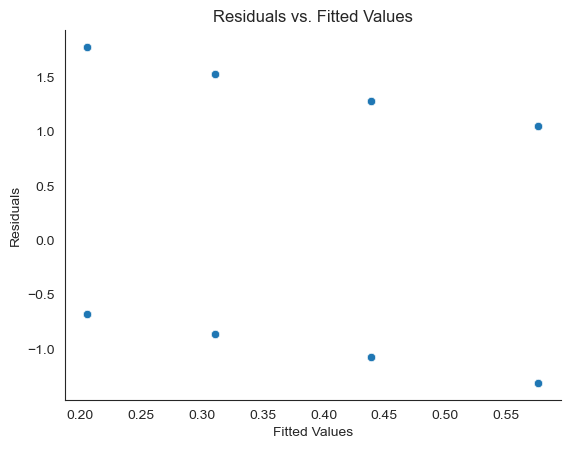

In [45]:
sns.scatterplot(x=fitted_values, y=residuals)
sns.despine()
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.savefig('suppfigure1d.png', dpi=300)

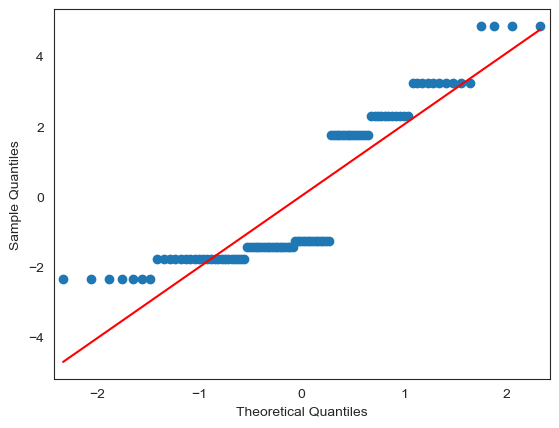

Text(0.5, 1.0, 'Q-Q Plot of Deviance Residuals')

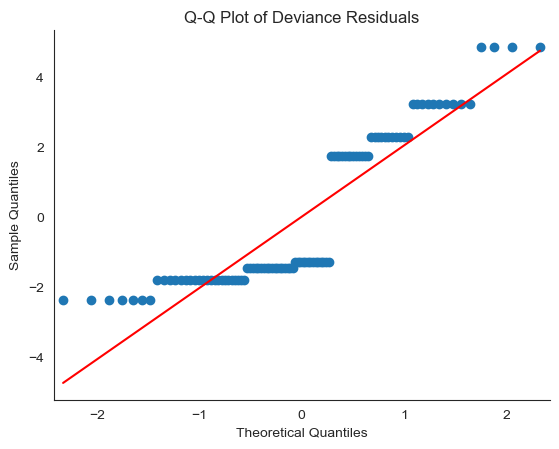

In [169]:
# Create the Q-Q plot
sm.qqplot(residuals, line='r') # 'r' specifies a regression line for comparison
plt.title('Q-Q Plot of Deviance Residuals')
sns.despine()
plt.savefig('suppfigure1e.png', dpi=300)

In [23]:
# additional model testing

model_1 = smf.glm('cop ~ age*resids', df_logreg, family=sm.families.Binomial()).fit()
model_2 = smf.glm('cop ~ age*C(morph_bin)', df_logreg, family=sm.families.Binomial()).fit()
model_3 = smf.glm('cop ~ age*pronotum_width', df_logreg, 
                  family=sm.families.Binomial()).fit()
model_4 = smf.glm('cop ~ resids + age + C(morph_bin) + pronotum_width', df_logreg, 
                  family=sm.families.Binomial()).fit()
#Table 2

In [24]:
print(model_1.summary())
model_1.aic
print(model_2.summary())
model_2.aic
print(model_3.summary())
model_3.aic
print(model_4.summary())
model_4.aic

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cop   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63.126
Date:                Wed, 09 Apr 2025   Deviance:                       126.25
Time:                        22:11:09   Pearson chi2:                     101.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.07223
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2551      0.752     -3.000      0.0

134.25261222057037

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cop   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.296
Date:                Wed, 09 Apr 2025   Deviance:                       124.59
Time:                        22:11:09   Pearson chi2:                     102.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.08751
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.21

132.5913852714567

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cop   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62.273
Date:                Wed, 09 Apr 2025   Deviance:                       124.55
Time:                        22:11:09   Pearson chi2:                     99.1
No. Iterations:                     5   Pseudo R-squ. (CS):            0.08793
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -16.2215     10

132.54594712933599

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    cop   No. Observations:                  100
Model:                            GLM   Df Residuals:                       95
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63.352
Date:                Wed, 09 Apr 2025   Deviance:                       126.70
Time:                        22:11:09   Pearson chi2:                     100.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06803
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5249      2.73

136.70390174715297

<Axes: xlabel='age', ylabel='cop'>

([<matplotlib.axis.XTick at 0x13a1c5c90>,
 [Text(3, 0, '3'), Text(5, 0, '5'), Text(7, 0, '7'), Text(9, 0, '9')])

Text(0.5, 0, 'Age (day)')

Text(0, 0.5, 'Probability of copulation')

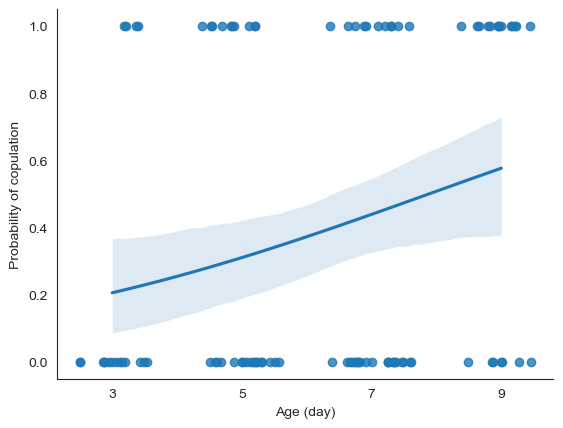

In [25]:
# figure 1c

sns.regplot(x='age', y='cop', data=df_logreg, x_jitter = 0.65, logistic=True)
sns.despine()
plt.xticks([3, 5, 7, 9])
plt.xlabel('Age (day)')
plt.ylabel('Probability of copulation')
plt.savefig('figure1c.png', dpi=300)

In [27]:
# binomial regression for courtship

# Replace string values with boolean values
df_3_9['morph_bin'] = df_3_9['female_morph'].replace({'LW': 0, 'SW': 1})

/var/folders/l2/9qxzr3354cdccgr3y1v4svrc0000gn/T/ipykernel_69218/3565923721.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_3_9['morph_bin'] = df_3_9['female_morph'].replace({'LW': 0, 'SW': 1})


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  court   No. Observations:                  160
Model:                            GLM   Df Residuals:                      155
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.64
Date:                Wed, 09 Apr 2025   Deviance:                       209.28
Time:                        22:16:21   Pearson chi2:                     160.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01504
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.4198      2.076      1.

<Axes: >

Text(0.5, 0, 'Fitted Values')

Text(0, 0.5, 'Residuals')

Text(0.5, 1.0, 'Residuals vs. Fitted Values')

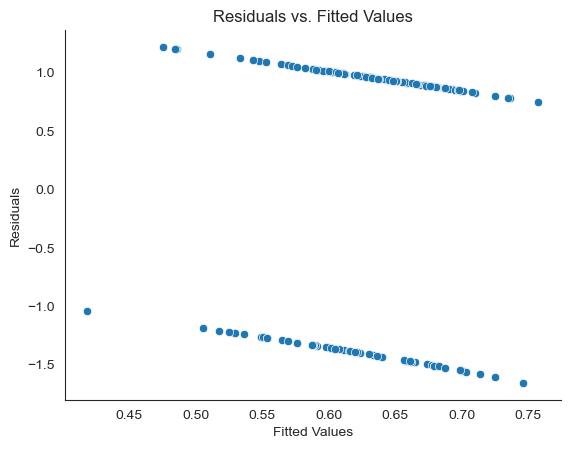

In [31]:
# binomial regression for courtship

model_court = glm('court ~ age+ morph_bin + resids + pronotum_width', data=df_3_9, family=sm.families.Binomial()).fit()
print(model_court.summary())
print(model_court.aic)
fitted_values = model_court.fittedvalues
residuals = model_court.resid_deviance
sns.scatterplot(x=fitted_values, y=residuals)
sns.despine()
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values")
plt.show()

In [38]:
# additional model testing

model_1 = smf.glm('court ~ age*resids', df_3_9, family=sm.families.Binomial()).fit()
model_2 = smf.glm('court ~ age*C(morph_bin)', df_3_9, family=sm.families.Binomial()).fit()
model_3 = smf.glm('court ~ age*pronotum_width', df_3_9, 
                  family=sm.families.Binomial()).fit()
model_4 = smf.glm('court ~ age*resids + C(morph_bin) + pronotum_width', df_3_9, 
                  family=sm.families.Binomial()).fit()
model_5 = smf.glm('court ~ age', df_3_9, 
                  family=sm.families.Binomial()).fit()
#Table 2

In [39]:
print(model_1.summary())
model_1.aic
print(model_2.summary())
model_2.aic
print(model_3.summary())
model_3.aic
print(model_4.summary())
model_4.aic
print(model_5.summary())
model_5.aic

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  court   No. Observations:                  160
Model:                            GLM   Df Residuals:                      156
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.35
Date:                Wed, 09 Apr 2025   Deviance:                       210.71
Time:                        22:21:57   Pearson chi2:                     160.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.006175
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0939      0.469      0.200      0.8

218.70913428039086

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  court   No. Observations:                  160
Model:                            GLM   Df Residuals:                      156
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.75
Date:                Wed, 09 Apr 2025   Deviance:                       209.50
Time:                        22:21:57   Pearson chi2:                     160.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01367
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.30

217.49763706516214

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  court   No. Observations:                  160
Model:                            GLM   Df Residuals:                      156
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.81
Date:                Wed, 09 Apr 2025   Deviance:                       209.62
Time:                        22:21:57   Pearson chi2:                     160.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01292
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4288      5

217.61907186273214

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  court   No. Observations:                  160
Model:                            GLM   Df Residuals:                      154
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -104.57
Date:                Wed, 09 Apr 2025   Deviance:                       209.14
Time:                        22:21:57   Pearson chi2:                     160.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.01585
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.4583      2.07

221.14405121040767

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  court   No. Observations:                  160
Model:                            GLM   Df Residuals:                      158
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.41
Date:                Wed, 09 Apr 2025   Deviance:                       210.81
Time:                        22:21:57   Pearson chi2:                     160.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.005524
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0951      0.469      0.203      0.8

214.81386902753863

<Axes: xlabel='age', ylabel='court'>

([<matplotlib.axis.XTick at 0x13c29d790>,
 [Text(3, 0, '3'), Text(5, 0, '5'), Text(7, 0, '7'), Text(9, 0, '9')])

Text(0.5, 0, 'Age (day)')

Text(0, 0.5, 'Probability of copulation')

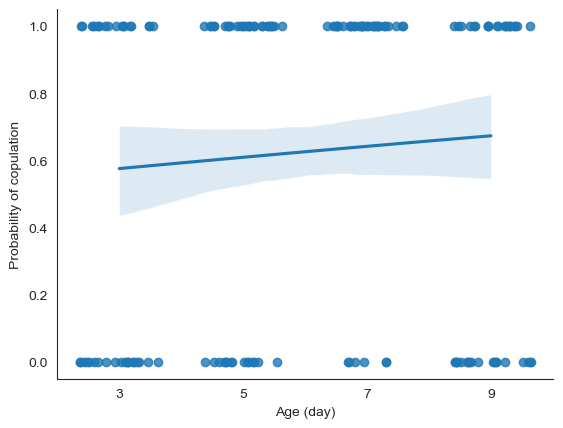

In [40]:
# figure 1c

sns.regplot(x='age', y='court', data=df_3_9, x_jitter = 0.65, logistic=True)
sns.despine()
plt.xticks([3, 5, 7, 9])
plt.xlabel('Age (day)')
plt.ylabel('Probability of copulation')
plt.savefig('suppfigure2b.png', dpi=300)